### To build the procgen
in terminal:
python -c "from procgen.builder import build; build()"

**If build fails with LNK1168 error:**
1. Restart Jupyter kernel
2. Close all Python processes
3. Delete .build folder and rebuild


```

**After installation, restart the Jupyter kernel!**

Note: We use sb3 2.0.0a5 which still supports gym 0.23.1 before the gymnasium migration.

### Prevent Auto-Build (Use Pre-Built DLLs Only)

Set environment variable to skip automatic rebuilding.

In [1]:
import os
# Prevent procgen from auto-rebuilding (must be set BEFORE importing procgen)
os.environ['PROCGEN_NO_BUILD'] = '1'
print("PROCGEN_NO_BUILD set - will use pre-built DLLs only")

PROCGEN_NO_BUILD set - will use pre-built DLLs only


In [1]:
import procgen
import os

# This should point to your local directory
print(procgen.__file__)
# Expected: C:\Users\matan\master_thesis\rl_envs\procgen\procgen\__init__.py

# Check the installation location (modern method)
import importlib.metadata
try:
    dist = importlib.metadata.distribution('procgen')
    print(f"Location: {dist.locate_file('')}")
    print(f"Version: {dist.version}")
except importlib.metadata.PackageNotFoundError:
    print("procgen package not found in installed packages")

# Alternative: check via module path
import procgen
print(f"Procgen module path: {os.path.dirname(procgen.__file__)}")



c:\Users\matan\master_thesis\rl_envs\procgen\procgen\__init__.py
Location: .
Version: 0.10.7+11f4fd4
Procgen module path: c:\Users\matan\master_thesis\rl_envs\procgen\procgen


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [ ]:

# Load a trained PPO model and run it on the existing `env`.
# If the model file is missing, fall back to random actions.
import os
from stable_baselines3 import PPO
import gym, time, procgen
from procgen.wrappers import make_fruitbot_basic

model_path = "models/fruitbot/20251119-125849_easy/ppo_final.zip"

# Control which level to test on
START_LEVEL = 0  # Change this to test different levels (0, 1, 2, ...)
NUM_LEVELS = 1   # Set to 1 for single level, 10 for training set, 0 for random

env = gym.make('procgen-fruitbot-v0', 
               render_mode='human', 
               distribution_mode='easy',
               )
env = make_fruitbot_basic(env)
obs = env.reset()
if os.path.exists(model_path):
    model = PPO.load(model_path)
    print(f"Loaded PPO model from {model_path}")
else:
    model = None
    print(f"Model not found at {model_path}. Falling back to random actions.")


# Run for a number of steps (or until user closes the viewer)
max_steps = 200
for step in range(max_steps):
    if model is not None:
        action, _states = model.predict(obs, deterministic=True)
    else:
        action = env.action_space.sample()

    result = env.step(action)
    # handle both gym (obs, rew, done, info) and gymnasium (obs, rew, done, truncated, info)
    if len(result) == 5:
        obs, rew, done, truncated, info = result
    else:
        obs, rew, done, info = result
        truncated = False

    if done or truncated:
        obs, _ = env.reset()

    # small delay so human viewer can follow
    time.sleep(0.02)

print("Run finished")

building procgen...done


c:\Users\matan\anaconda3\envs\rl_env\lib\site-packages\stable_baselines3\common\save_util.py:437: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.load(file_cont

Loaded PPO model from models/fruitbot/20251119-125849_easy/ppo_final.zip


ValueError: too many values to unpack (expected 2)

: 

In [ ]:
# Load a trained PPO model and run it on the existing `env`.
# If the model file is missing, fall back to random actions.
import os
from stable_baselines3 import PPO
import gym, time, procgen
from procgen.wrappers import make_fruitbot_basic

model_path = "models/fruitbot/20251123-133459_easy/ppo_final.zip"

# Control which level to test on
START_LEVEL = 0  # Change this to test different levels (0, 1, 2, ...)
NUM_LEVELS = 1   # Set to 1 for single level, 10 for training set, 0 for random

env = gym.make('procgen-fruitbot-v0', 
               render_mode='human', 
               distribution_mode='easy',
               )
env = make_fruitbot_basic(env)
obs = env.reset()
if os.path.exists(model_path):
    model = PPO.load(model_path)
    print(f"Loaded PPO model from {model_path}")
else:
    model = None
    print(f"Model not found at {model_path}. Falling back to random actions.")


# Run for a number of steps (or until user closes the viewer)
max_steps = 200
for step in range(max_steps):
    if model is not None:
        action, _states = model.predict(obs, deterministic=True)
    else:
        action = env.action_space.sample()

    result = env.step(action)
    # handle both gym (obs, rew, done, info) and gymnasium (obs, rew, done, truncated, info)
    if len(result) == 5:
        obs, rew, done, truncated, info = result
    else:
        obs, rew, done, info = result
        truncated = False

    if done or truncated:
        obs = env.reset()

    # small delay so human viewer can follow
    time.sleep(0.02)

print("Run finished")

c:\Users\matan\anaconda3\envs\rl_env\lib\site-packages\stable_baselines3\common\save_util.py:437: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.load(file_cont

Loaded PPO model from models/fruitbot/20251119-125849_easy/ppo_final.zip
Run finished


: 

## CNN architecuter

In [ ]:
from stable_baselines3 import PPO
import torch

# Load your trained model
model = PPO.load("models/fruitbot/20251117-143015/ppo_final.zip")

print("="*60)
print("FULL ACTOR-CRITIC NETWORK")
print("="*60)
print(model.policy)


# Count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("\n" + "="*60)
print("PARAMETER COUNT")
print("="*60)
print(f"Feature extractor: {count_parameters(model.policy.features_extractor):,} params")
print(f"Actor head: {count_parameters(model.policy.action_net):,} params")
print(f"Critic head: {count_parameters(model.policy.value_net):,} params")
print(f"Total: {count_parameters(model.policy):,} params")

FULL ACTOR-CRITIC NETWORK
ActorCriticCnnPolicy(
  (features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (pi_features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (vf_features_extracto

### Capture Viewer-Quality Images and Videos

Capture the exact same RGB frames that the Gym3 viewer shows.

In [1]:
# Capture high-resolution frames using render()
import os
import numpy as np
from stable_baselines3 import PPO
import gym, procgen
from procgen.wrappers import make_fruitbot_basic
import imageio
from PIL import Image


# Create outputs directory
os.makedirs("screenshots", exist_ok=True)

# Create environment with rgb_array rendering to enable render() method
env = gym.make('procgen-fruitbot-v0', 
               render_mode='rgb_array',
               distribution_mode='easy')
env = make_fruitbot_basic(env)

# After creating the environment, you can inspect the wrapper chain like this:
def print_wrapper_chain(env):
    i = 0
    while hasattr(env, 'env'):
        print(f"Wrapper {i}: {type(env).__name__}")
        env = env.env
        i += 1
    print(f"Base env: {type(env).__name__}")

print_wrapper_chain(env)

c:\Users\matan\anaconda3\envs\procgen_env_clone\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


building procgen...done
done
Wrapper 0: StayBonusWrapper
Wrapper 1: DiscreteActionWrapper
Wrapper 2: OrderEnforcing
Wrapper 3: RenderableToGymEnv
Wrapper 4: HighResRenderWrapper
Wrapper 5: ExtractDictObWrapper
Base env: ProcgenGym3Env
Wrapper 0: StayBonusWrapper
Wrapper 1: DiscreteActionWrapper
Wrapper 2: OrderEnforcing
Wrapper 3: RenderableToGymEnv
Wrapper 4: HighResRenderWrapper
Wrapper 5: ExtractDictObWrapper
Base env: ProcgenGym3Env


In [77]:
# Load model
model_path = "models/fruitbot/20251123-133459_easy/ppo_final.zip"

if os.path.exists(model_path):
    model = PPO.load(model_path)
    print(f"Loaded PPO model from {model_path}")
else:
    model = None
    print("Using random actions")

# Reset environment
obs = env.reset()
if isinstance(obs, tuple):
    obs = obs[0]

print(f"Observation shape: {obs.shape}")
print(f"Observation dtype: {obs.dtype}")

# Now render() will return high-resolution upscaled frames
frames = []

# Capture initial high-res frame
frame = env.render()
print(f"Initial rendered frame: {frame}")
if frame is not None:
    print(f"Rendered frame shape: {frame.shape}")
    frames.append(frame)

# Run a few steps and capture high-res frames
for step in range(5):
    # Take action
    if model is not None:
        action, _ = model.predict(obs, deterministic=True)
    else:
        action = env.action_space.sample()
    
    result = env.step(action)
    if len(result) == 5:
        obs, rew, done, truncated, info = result
        done = done or truncated
    else:
        obs, rew, done, info = result
    
    # Get high-resolution rendered frame
    frame = env.render()
    if frame is not None:
        frames.append(frame)
    
    if done:
        obs = env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]

# Save first frame as image
if frames:
    Image.fromarray(frames[0]).save("screenshots/fruitbot_highres_frame.png")
    print(f"Saved high-res screenshot to screenshots/fruitbot_highres_frame.png")
    
    # Save all frames as video
    video_path = "screenshots/fruitbot_highres_gameplay.mp4"
    imageio.mimsave(video_path, frames, fps=15)
    print(f"Saved high-res video to {video_path}")
else:
    print("No frames captured!")

env.close()

Using random actions
Observation shape: (64, 64, 3)
Observation dtype: uint8
Initial rendered frame: [[[145 162 167]
  [ 34  97 150]
  [ 32  92 146]
  ...
  [ 30  87 138]
  [ 32  90 140]
  [144 162 167]]

 [[145 162 167]
  [ 32  96 150]
  [ 30  89 141]
  ...
  [ 29  86 138]
  [ 31  88 139]
  [144 162 167]]

 [[145 162 167]
  [ 31  90 145]
  [ 29  88 140]
  ...
  [ 28  89 144]
  [ 30  88 139]
  [144 162 167]]

 ...

 [[144 162 167]
  [151 169 175]
  [160 179 185]
  ...
  [160 180 185]
  [151 170 175]
  [144 162 167]]

 [[144 162 167]
  [151 169 175]
  [160 179 185]
  ...
  [160 180 185]
  [151 170 175]
  [144 162 167]]

 [[144 162 167]
  [151 169 175]
  [160 179 185]
  ...
  [160 180 185]
  [151 170 175]
  [144 162 167]]]
Rendered frame shape: (512, 512, 3)
Saved high-res screenshot to screenshots/fruitbot_highres_frame.png


TypeError: write_frames() got an unexpected keyword argument 'audio_path'

### Record Full Episodes with Viewer-Quality Video



In [98]:
# Record full episodes with viewer-quality video
import os
import numpy as np
from stable_baselines3 import PPO
import gym, procgen
import imageio

model_path = "models\\fruitbot\\20251127-165318_easy\\ppo_final.zip"

# Create videos directory
os.makedirs("videos", exist_ok=True)

# Create environment with rgb_array rendering
env = gym.make(
            'procgen-fruitbot-v0', 
            render_mode='rgb_array',
            distribution_mode='easy',
            use_discrete_action_wrapper=True,
            use_stay_bonus_wrapper=True,
            stay_bonus=0.1,
        )

# Load model
if os.path.exists(model_path):
    model = PPO.load(model_path)
    print(f"Loaded PPO model from {model_path}")
else:
    model = None
    print("Using random actions")

# Record episodes
obs = env.reset()
if isinstance(obs, tuple):
    obs = obs[0]

done = False
episode_reward = 0
frames = []
    
while not done:
    # Capture high-res frame
    frame = env.render()
    if frame is not None:
        frames.append(frame)

    # Get action
    if model is not None:
        action, _ = model.predict(obs, deterministic=True)
    else:
        action = env.action_space.sample()
    
    # Step environment
    result = env.step(action)
    if len(result) == 5:
        obs, rew, done, truncated, info = result
        done = done or truncated
    else:
        obs, rew, done, info = result
    episode_reward += rew
    
    
    

# Validate frames before saving
valid_frames = []
for f in frames:
    arr = np.asarray(f)
    if arr.dtype != np.uint8:
        arr = arr.astype(np.uint8)
    if arr.ndim == 3 and arr.shape[2] == 3:
        valid_frames.append(arr)
    else:
        print(f"Skipping invalid frame with shape {arr.shape}")

print(f"Captured {len(valid_frames)} valid frames out of {len(frames)} total frames")

# Save frames as images
screenshots_dir = "tests\\frameshots"
if valid_frames:
    valid_frames = valid_frames + [valid_frames[-1]]*3  # Ensure at least one frame
    for idx, frame in enumerate(valid_frames):
        if idx % 3 == 0:  # Save every 3rd frame
            img_path = os.path.join(screenshots_dir, f"fruitbot_frame_{idx}.png")
            Image.fromarray(frame).save(img_path)
            print(f"Saved high-res screenshot to {img_path}")
# Save video
# if frames:
#     video_path = f"videos/fruitbot_highres_episode.mp4"
#     imageio.mimsave(video_path, frames, fps=15)
#     print(f"Reward: {episode_reward} - Frames: {len(frames)} - Saved to {video_path}")
# else:
#     print(f"No frames captured!")

# env.close()
# print("\nAll high-resolution videos saved to 'videos' folder")



Using prebuilt binaries from: c:\Users\matan\master_thesis\rl_envs\procgen\procgen\.build\relwithdebinfo\RelWithDebInfo
Loaded PPO model from models\fruitbot\20251127-165318_easy\ppo_final.zip
Captured 396 valid frames out of 396 total frames
Saved high-res screenshot to tests\frameshots\fruitbot_frame_0.png
Saved high-res screenshot to tests\frameshots\fruitbot_frame_3.png
Captured 396 valid frames out of 396 total frames
Saved high-res screenshot to tests\frameshots\fruitbot_frame_0.png
Saved high-res screenshot to tests\frameshots\fruitbot_frame_3.png
Saved high-res screenshot to tests\frameshots\fruitbot_frame_6.png
Saved high-res screenshot to tests\frameshots\fruitbot_frame_9.png
Saved high-res screenshot to tests\frameshots\fruitbot_frame_12.png
Saved high-res screenshot to tests\frameshots\fruitbot_frame_6.png
Saved high-res screenshot to tests\frameshots\fruitbot_frame_9.png
Saved high-res screenshot to tests\frameshots\fruitbot_frame_12.png
Saved high-res screenshot to tests\

## Analyze Bot Colors and Size

Inspect a sample frame to determine the exact RGB colors and dimensions of the robot (gray body + darker wheels).

Frame shape: (512, 512, 3), dtype: uint8
Bottom region shape: (2, 512, 3) (y from 460 to 512)



Filtered to 2 gray/black/white colors (from 846 total)

Top 30 GRAY/BLACK/WHITE colors (RGB) in bottom region:
Rank | RGB Color        | Count  | Fraction | Hex      | Category
-------------------------------------------------------------------------------------
   1 | (70, 70, 70)     |     32 |  3.12% | #464646 | GRAY (very uniform)
   2 | (84, 84, 84)     |      4 |  0.39% | #545454 | GRAY (very uniform)

Color palette (top 20 gray/black/white colors):


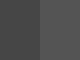


Color statistics from detected bot colors:
  Gray colors: 2
    R range: [70, 84]
    G range: [70, 84]
    B range: [70, 84]

Detected 2 connected components from gray/black/white pixels

Largest component (likely the bot):
  Bounding box: x=158, y=0, w=9, h=2
  Area: 18 pixels
  Centroid: (162.0, 0.5)
  Global position: x=158, y=460

Bot detection visualization:


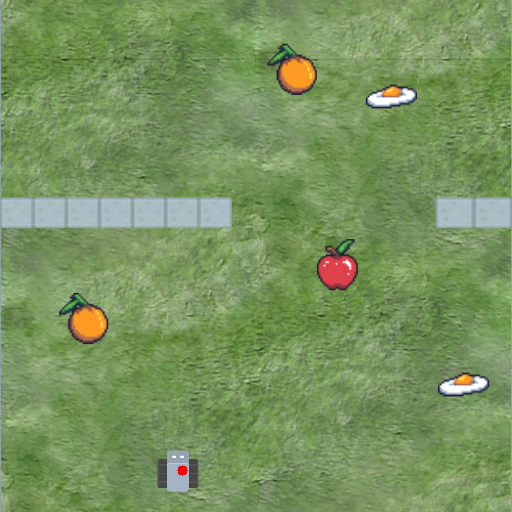


Top 10 GRAY/BLACK/WHITE colors in detected bot region:
Rank | RGB Color        | Count  | Fraction | Hex      | Category
--------------------------------------------------------------------------------
   1 | (70, 70, 70)     |     16 | 88.89% | #464646 | GRAY (body)
   2 | (84, 84, 84)     |      2 | 11.11% | #545454 | GRAY (body)


In [ ]:
import numpy as np
import cv2
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

# Load test frame and resize to 512x512x3
test_frame_path = "tests/frameshots/fruitbot_frame_12.png"
img = Image.open(test_frame_path)
img = img.resize((512, 512))
frame = np.array(img)

print(f"Frame shape: {frame.shape}, dtype: {frame.dtype}")

# Focus on bottom 1/5 of frame where bot is located
h, w, _ = frame.shape
y_start = int(h * 0.9)
bottom_region = frame[y_start:y_start+2, :, :]



print(f"Bottom region shape: {bottom_region.shape} (y from {y_start} to {h})")
display(Image.fromarray(bottom_region))

# Analyze colors in bottom region
pixels = bottom_region.reshape(-1, 3)
unique_colors, counts = np.unique(pixels, axis=0, return_counts=True)

# Filter for GRAY, BLACK, and WHITE colors only (bot-like colors)
# Gray: low variance between R,G,B channels, mid-range values
# Black: all channels low
# White: all channels high
def is_gray_black_or_white(rgb, max_variance=30, gray_min=60, gray_max=200, black_max=60, white_min=200):
    """Check if RGB color is gray-ish, black, or white"""
    r, g, b = rgb
    variance = np.var([r, g, b])
    mean_val = np.mean([r, g, b])
    
    is_black = (r < black_max) and (g < black_max) and (b < black_max)
    is_white = (r >= white_min) and (g >= white_min) and (b >= white_min) and (variance < max_variance)
    is_gray = (variance < max_variance) and (gray_min <= mean_val <= gray_max)
    
    return is_black or is_gray or is_white

# Filter to bot-like colors
bot_color_mask = np.array([is_gray_black_or_white(col) for col in unique_colors])
bot_colors = unique_colors[bot_color_mask]
bot_counts = counts[bot_color_mask]

print(f"\nFiltered to {len(bot_colors)} gray/black/white colors (from {len(unique_colors)} total)")

if len(bot_colors) > 0:
    bot_order = np.argsort(-bot_counts)
    
    print("\nTop 30 GRAY/BLACK/WHITE colors (RGB) in bottom region:")
    print("Rank | RGB Color        | Count  | Fraction | Hex      | Category")
    print("-" * 85)
    for i, idx in enumerate(bot_order[:30], 1):
        col = tuple(int(v) for v in bot_colors[idx])
        cnt = int(bot_counts[idx])
        frac = cnt / float(pixels.shape[0])
        hex_color = "#{:02x}{:02x}{:02x}".format(*col)
        
        # Categorize
        if max(col) < 60:
            category = "BLACK"
        elif min(col) >= 200 and np.var(col) < 30:
            category = "WHITE"
        elif np.var(col) < 10:
            category = "GRAY (very uniform)"
        else:
            category = "GRAY (slight tint)"
        
        print(f"{i:4} | {col!s:16} | {cnt:6} | {frac:6.2%} | {hex_color} | {category}")
    
    # Create palette of top 20 gray/black/white colors
    top_n = min(20, len(bot_order))
    palette_h = 60
    palette = np.zeros((palette_h, 40 * top_n, 3), dtype=np.uint8)
    for i, idx in enumerate(bot_order[:top_n]):
        palette[:, i*40:(i+1)*40, :] = bot_colors[idx]
    
    print("\nColor palette (top 20 gray/black/white colors):")
    display(Image.fromarray(palette))
    
    # Now detect bot using refined thresholds from actual colors
    # Get the range of gray/black/white colors actually present
    if len(bot_colors) > 0:
        black_colors = bot_colors[[max(c) < 60 for c in bot_colors]]
        white_colors = bot_colors[[min(c) >= 200 and np.var(c) < 30 for c in bot_colors]]
        gray_colors = bot_colors[[not (max(c) < 60 or (min(c) >= 200 and np.var(c) < 30)) for c in bot_colors]]
        
        print(f"\nColor statistics from detected bot colors:")
        if len(black_colors) > 0:
            print(f"  Black colors: {len(black_colors)}")
            print(f"    Max value: {black_colors.max()}")
        if len(white_colors) > 0:
            print(f"  White colors: {len(white_colors)}")
            print(f"    Min value: {white_colors.min()}")
            print(f"    R range: [{white_colors[:,0].min()}, {white_colors[:,0].max()}]")
            print(f"    G range: [{white_colors[:,1].min()}, {white_colors[:,1].max()}]")
            print(f"    B range: [{white_colors[:,2].min()}, {white_colors[:,2].max()}]")
        if len(gray_colors) > 0:
            print(f"  Gray colors: {len(gray_colors)}")
            print(f"    R range: [{gray_colors[:,0].min()}, {gray_colors[:,0].max()}]")
            print(f"    G range: [{gray_colors[:,1].min()}, {gray_colors[:,1].max()}]")
            print(f"    B range: [{gray_colors[:,2].min()}, {gray_colors[:,2].max()}]")
else:
    print("No gray/black/white colors found - bot may not be visible in this region")

# Detect bot using gray/black/white color masks
gray_mask = np.zeros(bottom_region.shape[:2], dtype=np.uint8)
black_mask = np.zeros(bottom_region.shape[:2], dtype=np.uint8)
white_mask = np.zeros(bottom_region.shape[:2], dtype=np.uint8)

for y in range(bottom_region.shape[0]):
    for x in range(bottom_region.shape[1]):
        rgb = tuple(bottom_region[y, x, :])
        if is_gray_black_or_white(rgb):
            if max(rgb) < 60:
                black_mask[y, x] = 255
            elif min(rgb) >= 200 and np.var(rgb) < 30:
                white_mask[y, x] = 255
            else:
                gray_mask[y, x] = 255

combined_mask = cv2.bitwise_or(cv2.bitwise_or(gray_mask, black_mask), white_mask)

# Clean up mask
kernel = np.ones((3,3), np.uint8)
combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel, iterations=2)
combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(combined_mask, connectivity=8)

print(f"\nDetected {num_labels - 1} connected components from gray/black/white pixels")
if num_labels > 1:
    areas = stats[1:, cv2.CC_STAT_AREA]
    largest_idx = 1 + int(np.argmax(areas))
    
    x = stats[largest_idx, cv2.CC_STAT_LEFT]
    y = stats[largest_idx, cv2.CC_STAT_TOP]
    w_box = stats[largest_idx, cv2.CC_STAT_WIDTH]
    h_box = stats[largest_idx, cv2.CC_STAT_HEIGHT]
    area = stats[largest_idx, cv2.CC_STAT_AREA]
    cx, cy = centroids[largest_idx]
    
    print(f"\nLargest component (likely the bot):")
    print(f"  Bounding box: x={x}, y={y}, w={w_box}, h={h_box}")
    print(f"  Area: {area} pixels")
    print(f"  Centroid: ({cx:.1f}, {cy:.1f})")
    print(f"  Global position: x={x}, y={y_start + y}")
    
    # Visualize detection
    vis = bottom_region.copy()
    vis = frame.copy()
    # cv2.rectangle(vis, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)
    cv2.circle(vis, (int(cx)+15, 470), 5, (255, 0, 0), -1)
    
    print("\nBot detection visualization:")
    display(Image.fromarray(vis))
    
    # Extract bot region and re-analyze its colors
    bot_region = bottom_region[y:y+h_box, x:x+w_box, :]
    bot_pixels_extracted = bot_region.reshape(-1, 3)
    bot_unique_extracted, bot_counts_extracted = np.unique(bot_pixels_extracted, axis=0, return_counts=True)
    
    # Filter to gray/black/white in extracted region
    bot_gbw_mask = np.array([is_gray_black_or_white(col) for col in bot_unique_extracted])
    bot_gbw_colors = bot_unique_extracted[bot_gbw_mask]
    bot_gbw_counts = bot_counts_extracted[bot_gbw_mask]
    
    if len(bot_gbw_colors) > 0:
        bot_gbw_order = np.argsort(-bot_gbw_counts)
        
        print(f"\nTop 10 GRAY/BLACK/WHITE colors in detected bot region:")
        print("Rank | RGB Color        | Count  | Fraction | Hex      | Category")
        print("-" * 80)
        for i, idx in enumerate(bot_gbw_order[:10], 1):
            col = tuple(int(v) for v in bot_gbw_colors[idx])
            cnt = int(bot_gbw_counts[idx])
            frac = cnt / float(bot_pixels_extracted.shape[0])
            hex_color = "#{:02x}{:02x}{:02x}".format(*col)
            
            if max(col) < 60:
                category = "BLACK (wheels)"
            elif min(col) >= 200 and np.var(col) < 30:
                category = "WHITE (highlights)"
            elif np.var(col) < 10:
                category = "GRAY (body)"
            else:
                category = "GRAY (tinted)"
            
            print(f"{i:4} | {col!s:16} | {cnt:6} | {frac:6.2%} | {hex_color} | {category}")

In [90]:
import numpy as np
from PIL import Image, ImageDraw

def hex_to_rgb(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16) for i in (0, 2, 4))

def find_x_on_row(frame: np.ndarray, target_hex: str = '#464646', row: int = 470) -> int:
    """Return median x index on `row` where pixel equals target_hex. Return None if no match."""
    img = np.asarray(frame)
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError('frame must be HxWx3 RGB uint8')
    h, w, _ = img.shape
    if row < 0 or row >= h:
        raise ValueError('row out of bounds')
    target = np.array(hex_to_rgb(target_hex), dtype=np.uint8)
    row_pixels = img[row, :, :]
    matches = np.all(row_pixels == target, axis=1)
    xs = np.nonzero(matches)[0]
    if xs.size == 0:
        return None
    return int(np.median(xs))

def draw_orenge_dot(frame: np.ndarray, x: int, y: int, offset_x: int = 10, radius: int = 3) -> np.ndarray:
    """Draw a red filled dot at (x+offset_x, y) on a copy of frame and return it. If x is None, returns a copy unchanged."""
    img = np.asarray(frame).copy()
    h, w, _ = img.shape
    if x is None:
        return img
    dot_x = int(np.clip(x + offset_x, 0, w - 1))
    dot_y = int(np.clip(y, 0, h - 1))
    pil = Image.fromarray(img)
    draw = ImageDraw.Draw(pil)
    left = max(dot_x - radius, 0)
    top = max(dot_y - radius, 0)
    right = min(dot_x + radius, w - 1)
    bottom = min(dot_y + radius, h - 1)
    draw.ellipse((left, top, right, bottom), fill=(255, 165, 0))
    return np.array(pil)

# Quick test (uses tests/frameshots/fruitbot_frame_3.png if present)
try:
    frames_jumps = 3
    base_path = 'tests/frameshots/fruitbot_frame_0.png'
    base_img = Image.open(base_path).convert('RGB').resize((512, 512))
    base_frame = np.array(base_img) 
    page_steps = 66
    for i in range(page_steps//frames_jumps + 1):
        image_path = f'tests/frameshots/fruitbot_frame_{frames_jumps*i}.png'
        if os.path.exists(image_path):
            pil_img = Image.open(image_path).convert('RGB').resize((512, 512))
        frame = np.array(pil_img)
        cx = find_x_on_row(frame, '#464646', row=470)
        bot_step = 7
        base_frame = draw_orenge_dot(base_frame, cx, 470 - (bot_step*frames_jumps*i), offset_x=4, radius=5)
    if cx is not None:
        out_path = 'tests/frameshots/fruitbot_frame_marked.png'
        Image.fromarray(base_frame).save(out_path)
        print(f'Found match at cx={cx}. Saved annotated image to {out_path}')
    else:
        print('No exact #464646 pixel found on row 470.')
except FileNotFoundError:
    print('Test image not found; functions are defined for use in notebook.')

Found match at cx=227. Saved annotated image to tests/frameshots/fruitbot_frame_marked.png


In [ ]:
def record_bot_path_on_frames(starting_image_path: str,
                              frames_jumps: int = 3,
                              page_steps: int = 23,
                              bot_step: int = 7,
                              row: int = 470,
                              target_hex: str = '#464646',
                              offset_x: int = 4,
                              radius: int = 5,
                            #   out_path: str = 'tests/frameshots/fruitbot_frame_marked.png',
                              path_number: int = 1) -> Image.Image:
    """Record bot path on frames and return the final annotated image."""

    base_image = Image.open(starting_image_path).convert('RGB').resize((512, 512))
    base_frame = np.array(base_image)
    for i in range(page_steps):
        image_path = f'tests/frameshots/fruitbot_frame_{frames_jumps*i}.png'
        if os.path.exists(image_path):
            pil_img = Image.open(image_path).convert('RGB').resize((512, 512))
        else:
            print(f'Image not found: {image_path}, skipping.')
            break
        frame = np.array(pil_img)
        cx = find_x_on_row(frame, target_hex, row=row)
        base_frame = draw_orenge_dot(base_frame, cx, row - (bot_step*frames_jumps*i), offset_x=offset_x, radius=radius)
    return Image.fromarray(base_frame)



path_image_0 = record_bot_path_on_frames('tests/frameshots/fruitbot_frame_0.png')
path_image_0.save('tests/frameshots/fruitbot_path_0.png')

Saved combined image to tests/frameshots/fruitbot_combined_top_sec.png


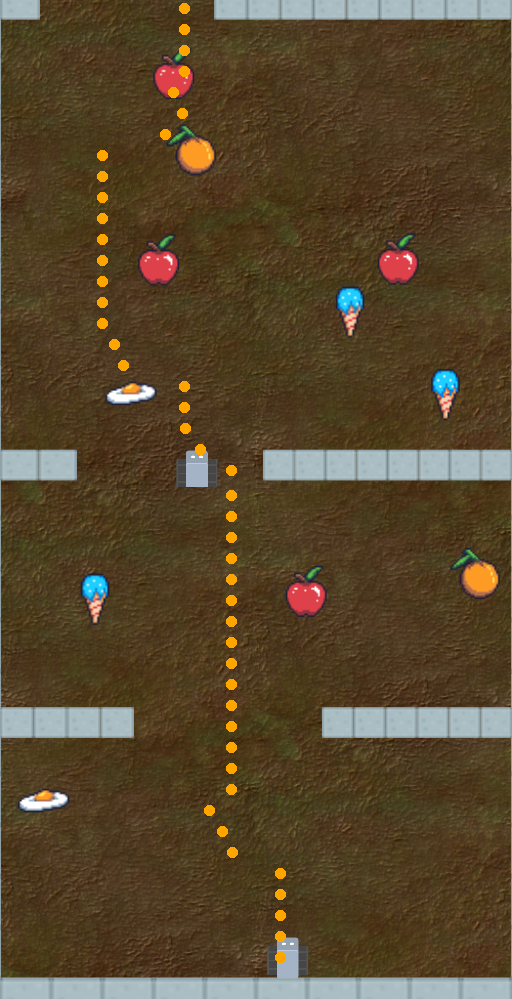

In [92]:
first_image_path = 'tests/frameshots/fruitbot_frame_marked.png'
sec_image_path = 'tests/frameshots/fruitbot_frame_marked2.png'

img1 = Image.open(first_image_path).convert('RGB')
img2 = Image.open(sec_image_path).convert('RGB')

w1, h1 = img1.size
w2, h2 = img2.size
out_w = max(w1, w2)
out_h = h1 + h2 - 25  # subtract cut_px from total height

combined = Image.new('RGB', (out_w, out_h), (0, 0, 0))

cut_px = 25  # pixels to remove from bottom of second image
w2, h2 = img2.size
img2_cropped = img2.crop((0, 0, w2, max(0, h2 - cut_px)))

# center horizontally when pasting
combined.paste(img2_cropped, ((out_w - w2) // 2, 0))      # sec_image on top
combined.paste(img1, ((out_w - w1) // 2, img2_cropped.height))     # first image below

out_path = 'tests/frameshots/fruitbot_combined_top_sec.png'
combined.save(out_path)
print(f"Saved combined image to {out_path}")
display(combined)